## Time series forecasting on Technology sales 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_excel("Sample - Superstore.xls")

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
technology = df.loc[df['Category'] == 'Technology']

In [12]:
print(technology['Order Date'].min())
print(technology['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [13]:
technology.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152


Data preprocessing

In [14]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)

In [15]:
technology = technology.sort_values('Order Date')

In [18]:
technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [19]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

In [20]:
technology.head()

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20


In [21]:
technology = technology.set_index('Order Date')
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

Average daily sales value for that month , indexing on first data of the month 

In [22]:
y = technology['Sales'].resample('MS').mean()

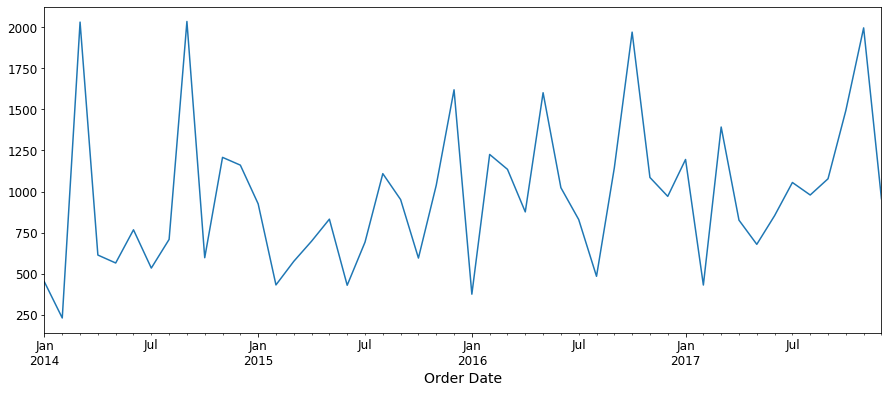

In [24]:
y.plot(figsize=(15,6))
plt.show()

Decompose time series to visualize trend and seasonality

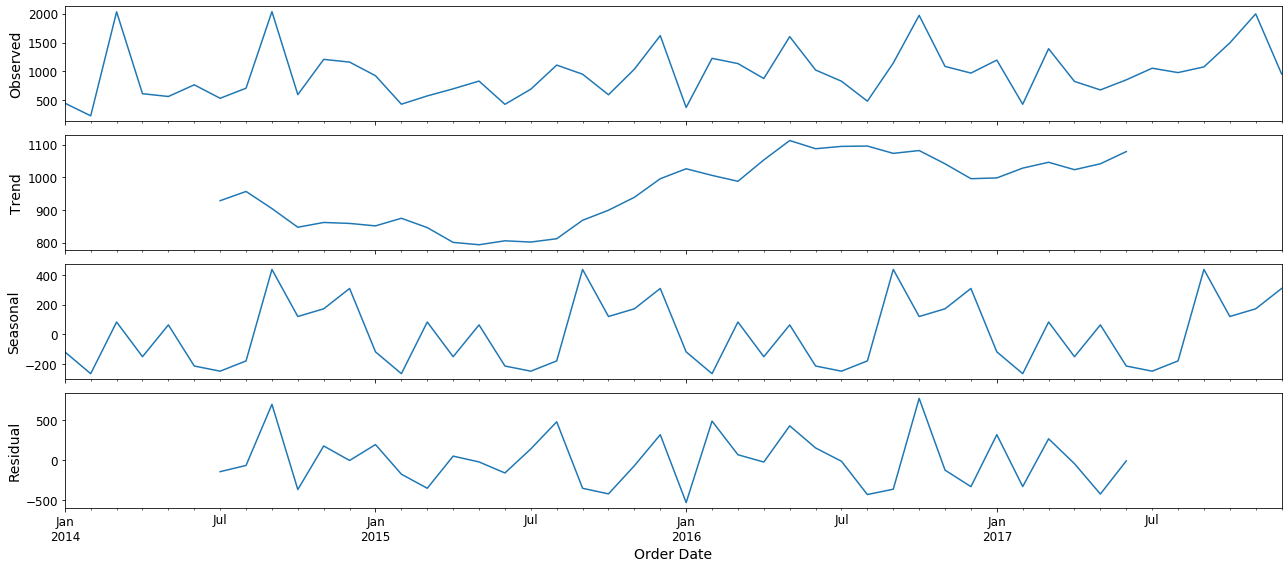

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fit = decomposition.plot()
plt.show()

Generate random combinations fo PDQ and choose the one with lowest AIC value

In [28]:
p = d  = q = range(0,2)
pdq = list(itertools.product(p,d,q))
print(pdq)
len(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


8

In [29]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [30]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y,
                        order=param,
                        seasonal_order=param_seasonal,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
            
            result = model.fit()
            print(f'ARIMA{param} x {param_seasonal} 12 - AIC:{result.aic}')
        except:
            continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 - AIC:791.4891765009955
ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 - AIC:1381.0347611064951
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 - AIC:549.0156237882128


C:\Users\ankit.dubey\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ankit.dubey\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 - AIC:564.1031529698099
ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 - AIC:1487.9034425622215
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 - AIC:372.6612068172691
ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 - AIC:750.8969484750885
ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 - AIC:3051.8298780187833
ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 - AIC:535.0489454747435
ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 - AIC:566.0827904028376
ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 - AIC:2875.8349964287036
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 - AIC:373.8760065868629
ARIMA(0, 1, 0) x (0, 0, 0, 12) 12 - AIC:729.3478530237927


C:\Users\ankit.dubey\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x (0, 0, 1, 12) 12 - AIC:1417.9210308851436
ARIMA(0, 1, 0) x (0, 1, 0, 12) 12 - AIC:562.7585881087532
ARIMA(0, 1, 0) x (1, 0, 0, 12) 12 - AIC:543.3082156228088
ARIMA(0, 1, 0) x (1, 0, 1, 12) 12 - AIC:1442.4744068537384
ARIMA(0, 1, 0) x (1, 1, 0, 12) 12 - AIC:377.03544814349607
ARIMA(0, 1, 1) x (0, 0, 0, 12) 12 - AIC:675.9599897483578
ARIMA(0, 1, 1) x (0, 0, 1, 12) 12 - AIC:3170.751365083307
ARIMA(0, 1, 1) x (0, 1, 0, 12) 12 - AIC:517.5329284811334
ARIMA(0, 1, 1) x (1, 0, 0, 12) 12 - AIC:526.5542322434043
ARIMA(0, 1, 1) x (1, 0, 1, 12) 12 - AIC:2691.5469979588815
ARIMA(0, 1, 1) x (1, 1, 0, 12) 12 - AIC:359.5230842754364
ARIMA(1, 0, 0) x (0, 0, 0, 12) 12 - AIC:742.0250351345342


C:\Users\ankit.dubey\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (0, 0, 1, 12) 12 - AIC:1645.172866099678
ARIMA(1, 0, 0) x (0, 1, 0, 12) 12 - AIC:550.272134077019
ARIMA(1, 0, 0) x (1, 0, 0, 12) 12 - AIC:543.2786122758232


C:\Users\ankit.dubey\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (1, 0, 1, 12) 12 - AIC:1372.6407565422146
ARIMA(1, 0, 0) x (1, 1, 0, 12) 12 - AIC:359.37687065897023
ARIMA(1, 0, 1) x (0, 0, 0, 12) 12 - AIC:699.8975570622567
ARIMA(1, 0, 1) x (0, 0, 1, 12) 12 - AIC:2628.485372710168
ARIMA(1, 0, 1) x (0, 1, 0, 12) 12 - AIC:536.8995751104102
ARIMA(1, 0, 1) x (1, 0, 0, 12) 12 - AIC:527.7942232914842
ARIMA(1, 0, 1) x (1, 0, 1, 12) 12 - AIC:2692.815432312765
ARIMA(1, 0, 1) x (1, 1, 0, 12) 12 - AIC:361.314925797491
ARIMA(1, 1, 0) x (0, 0, 0, 12) 12 - AIC:717.9677328156988


C:\Users\ankit.dubey\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (0, 0, 1, 12) 12 - AIC:1427.3544014674299
ARIMA(1, 1, 0) x (0, 1, 0, 12) 12 - AIC:555.4581770800665
ARIMA(1, 1, 0) x (1, 0, 0, 12) 12 - AIC:522.504250679654


C:\Users\ankit.dubey\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (1, 0, 1, 12) 12 - AIC:1357.099387128099
ARIMA(1, 1, 0) x (1, 1, 0, 12) 12 - AIC:355.12595472751764
ARIMA(1, 1, 1) x (0, 0, 0, 12) 12 - AIC:677.6306925349004
ARIMA(1, 1, 1) x (0, 0, 1, 12) 12 - AIC:2607.8156734643567
ARIMA(1, 1, 1) x (0, 1, 0, 12) 12 - AIC:518.790371045406
ARIMA(1, 1, 1) x (1, 0, 0, 12) 12 - AIC:513.1256895923934


C:\Users\ankit.dubey\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1) x (1, 0, 1, 12) 12 - AIC:2624.963534640311
ARIMA(1, 1, 1) x (1, 1, 0, 12) 12 - AIC:343.60373359734376


In [32]:
model =sm.tsa.statespace.SARIMAX(y,
                order=(1,1,1),
                seasonal_order=(1,1,0,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.249     -1.067      0.286      -0.755       0.223
ma.L1         -1.0001      0.348     -2.870      0.004      -1.683      -0.317
ar.S.L12      -0.5003      0.175     -2.852      0.004      -0.844      -0.157
sigma2      2.243e+05   1.55e-06   1.44e+11      0.000    2.24e+05    2.24e+05


In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -167.802
Date:                            Thu, 09 Jan 2020   AIC                            343.604
Time:                                    16:03:33   BIC                            347.968
Sample:                                01-01-2014   HQIC                           344.632
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.249     -1.067      0.286      -0.755       0.223
ma.L1         -1.0001      0.348     -2.870      0.004      -1.683      -0.317
ar.S.L12      -0.5003      0.175     -2.852      0.004      -0.844      -0.157
sigma2      2.243e+05   1.55e-06   1.44e+11      0.000    2.24e+05    2.24e+05
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.58
Prob(Q):                               nan   Prob(JB):                         0.75
Heteroskedasticity (H):               0.47   Skew:                             0.39
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+26. Standard errors may be unstable.
"""

Model Diagnositics
 - Residuls are normally distributed

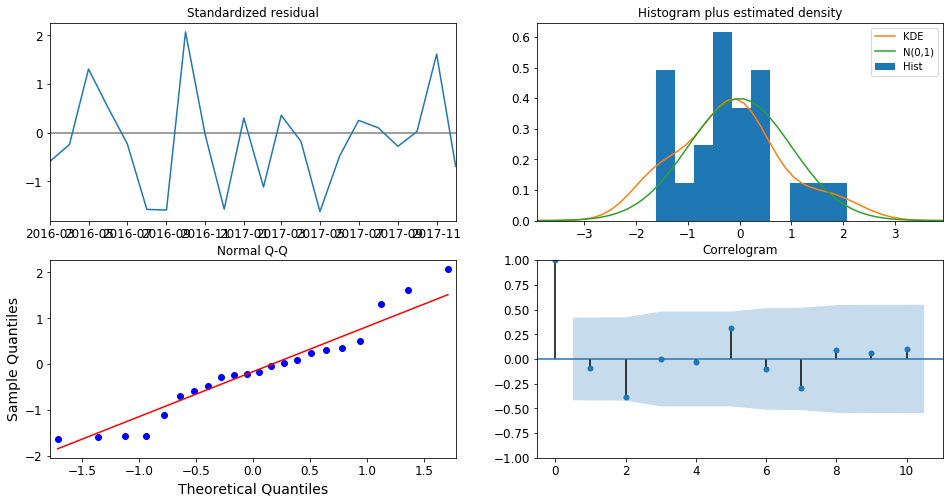

In [34]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

### Validating forecast

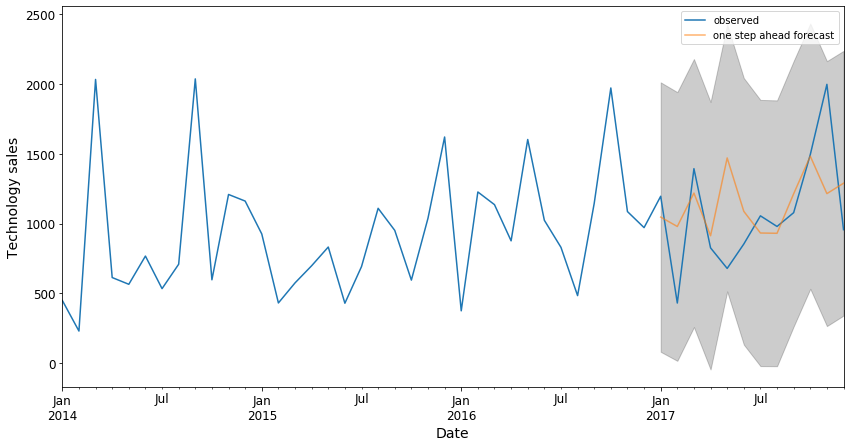

In [38]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False) 
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='one step ahead forecast', alpha=0.6, figsize=(14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Technology sales')
plt.legend()
plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted-y_truth)** 2).mean()
print(f'RMSE is {round(np.sqrt(mse),2)}')

RMSE is 387.42


### Visualizing forecast

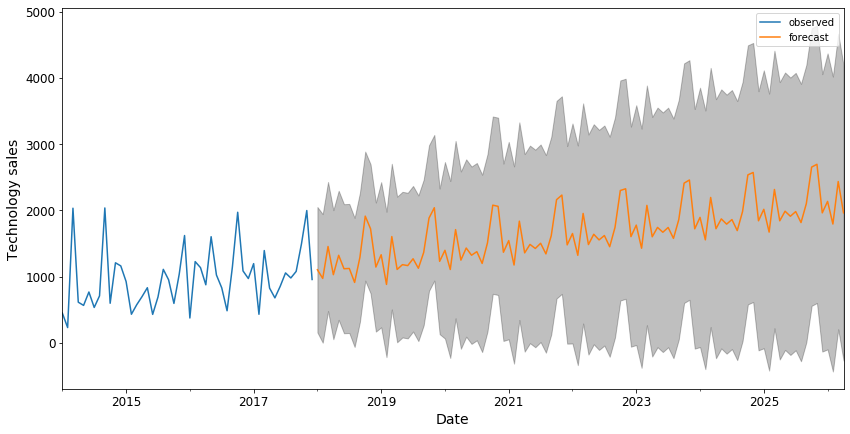

In [44]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology sales')
plt.legend()
plt.show()